In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
 

In [64]:
np.random.seed(42)

data = { 
    'product_id':range(1, 21),
    'product_name':[f'product{i}' for i in range(1,21)],
    'category': np.random.choice(['electronics','cloths','home','sports'], 20),
    'unit_sold':np.random.poisson(lam=20, size=20),
    'sale_date':pd.date_range(start='2023-01-01',periods=20)
}
sales_data = pd.DataFrame(data)
print("Sales Data:")
print(sales_data)


Sales Data:
    product_id product_name     category  unit_sold  sale_date
0            1     product1         home         25 2023-01-01
1            2     product2       sports         15 2023-01-02
2            3     product3  electronics         17 2023-01-03
3            4     product4         home         19 2023-01-04
4            5     product5         home         21 2023-01-05
5            6     product6       sports         17 2023-01-06
6            7     product7  electronics         19 2023-01-07
7            8     product8  electronics         16 2023-01-08
8            9     product9         home         21 2023-01-09
9           10    product10       cloths         21 2023-01-10
10          11    product11         home         17 2023-01-11
11          12    product12         home         22 2023-01-12
12          13    product13         home         14 2023-01-13
13          14    product14         home         17 2023-01-14
14          15    product15       sports   

In [53]:
# Save the DataFrame as a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [54]:
# path location
import os
os.getcwd()

'c:\\Users\\YESHWANTH\\statistics'

In [55]:
# Descriptive statistics
descriptive_stats = sales_data['unit_sold'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional statistics
mean_sales = sales_data['unit_sold'].mean()
median_sales = sales_data['unit_sold'].median()
mode_sales = sales_data['unit_sold'].mode()[0]
variance_sales = sales_data['unit_sold'].var()
std_deviation_sales = sales_data['unit_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['unit_sold'].agg(['sum', 'mean', 'std']).reset_index()
category_stats.columns = ['Category', 'Total Unit Sold', 'Average Unit Sold', 'Std Dev of Unit Sold']

# Display the results
print("\nStatistical Analysis:")
print(f"Mean Unit Sold: {mean_sales}")
print(f"Median Unit Sold: {median_sales}")
print(f"Mode Unit Sold: {mode_sales}")
print(f"Variance of Unit Sold: {variance_sales}")
print(f"Standard Deviation of Unit Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: unit_sold, dtype: float64

Statistical Analysis:
Mean Unit Sold: 18.8
Median Unit Sold: 18.5
Mode Unit Sold: 17
Variance of Unit Sold: 10.90526315789474
Standard Deviation of Unit Sold: 3.3023117899275864

Category Statistics:
  Category  Total Unit Sold  Average Unit Sold  Std Dev of Unit Sold
0      clo               21          21.000000                   NaN
1      ele               73          18.250000              2.217356
2     home              181          20.111111              3.723051
3   sports              101          16.833333              2.714160


In [56]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['unit_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['unit_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(17.254470507823573, 20.34552949217643)


In [60]:
# Confidence Interval for the mean of units sold
confidence_level = 0.99
degrees_freedom = len(sales_data['unit_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['unit_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Unit Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Unit Sold:
(16.687430485978535, 20.912569514021467)


In [62]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['unit_sold'], 20)

print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


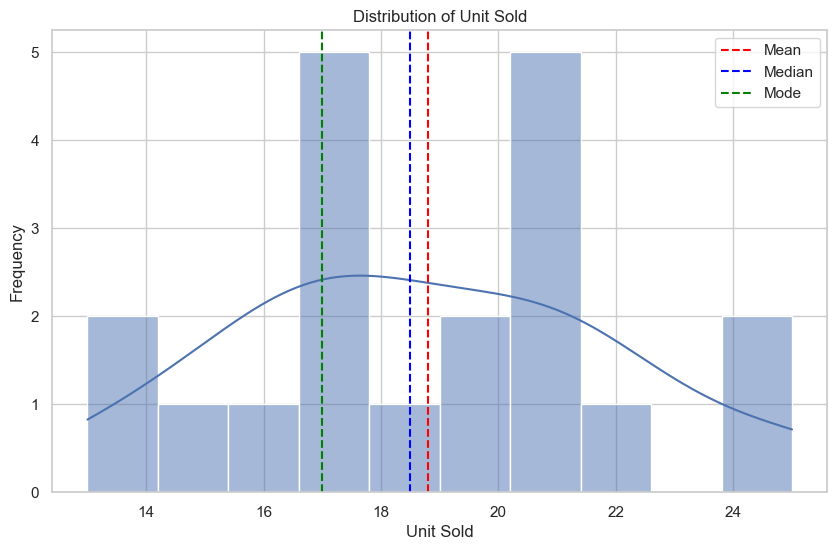

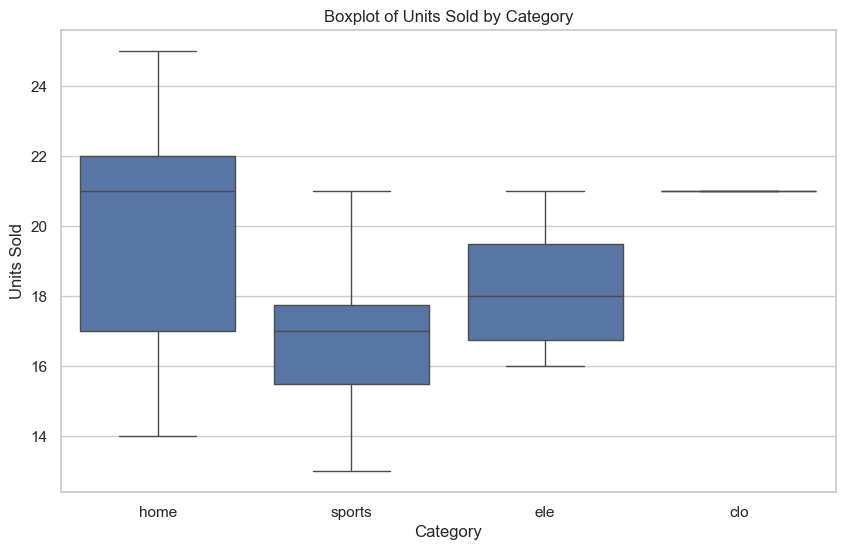

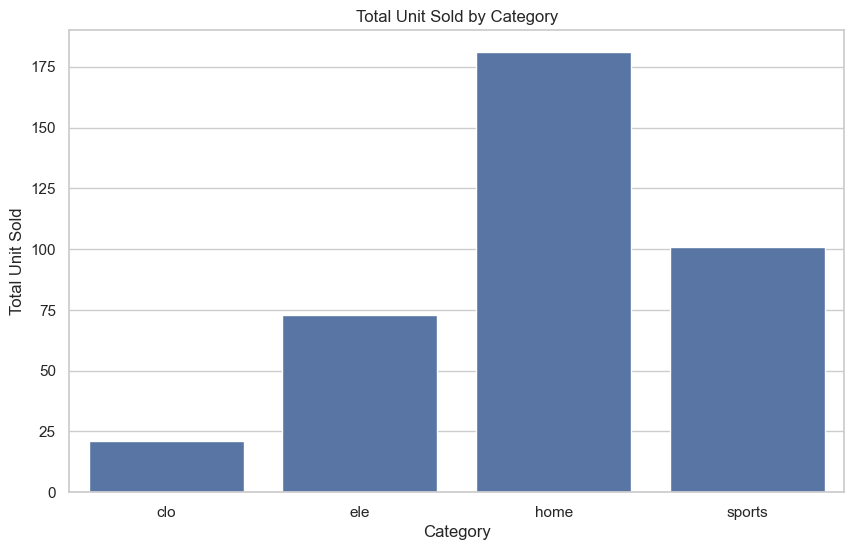

In [63]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['unit_sold'], bins=10, kde=True)
plt.title('Distribution of Unit Sold')
plt.xlabel('Unit Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='unit_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Unit Sold', data=category_stats)
plt.title('Total Unit Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Unit Sold')
plt.show()